In [1]:
import numpy as np
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0' 
import tensorflow as tf
from Networks import *
from Functions import *
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def set_plot_style():
    # Funzione per calcolare le dimensioni della figura
    def figsize(full, iphi=0.6180469715698392):
        width = 3.487 * (2.0 if full else 1.0)
        height = width * iphi
        return (width, height)
    
    # Configurazione dei parametri matplotlib
    plt.rcParams.update({
        'text.usetex': True,
        'figure.dpi': 200,
        'figure.figsize': figsize(False),
        'path.simplify': True,
        'font.family': 'serif',
        'mathtext.fontset': 'custom',
        'xtick.major.size': 5,
        'ytick.major.size': 5,
        'xtick.minor.size': 2.5,
        'ytick.minor.size': 2.5,
        'xtick.major.width': 0.8,
        'ytick.major.width': 0.8,
        'xtick.minor.width': 0.8,
        'ytick.minor.width': 0.8,
        'lines.markeredgewidth': 0.8,
        'legend.numpoints': 1,
        'legend.frameon': True,
        'legend.handletextpad': 0.3,
        'xtick.labelsize': 8,
        'ytick.labelsize': 8,
        'axes.labelsize': 8,
        'legend.fontsize': 7,
        'legend.title_fontsize': 7,
        'lines.linewidth': 1.0,
        'lines.markersize': 3.0
    })

# Codice principale per il plot
set_plot_style()  # Applica lo stile

In [16]:
N = 20;   β = 1000; iter = 100
magns1=[]
γ = np.linspace(0,0.3,10)
for g in tqdm(γ):
    K = int(N*g)
    if K <1:
        K=1
    ξ = gen_patterns_hop(N, K,  iter)
    Mtrain = 5
    Mval = 1
    #η, r = gen_archetypes_Hop(ξ, Mtrain, 0.0)
    σr = tf.transpose(gen_dataset_hop(ξ, 1.0, Mval), perm=[0, 2, 1])
    Jij = Hebb_J_hop(ξ)

    Net = Hopfield_Network()
    Net.prepare(Jij)
    Net.dynamics(σr, β, 1000)
    magn = tf.abs(tf.einsum("SiM, Si->SM" ,Net.σ, ξ[:,0,:])/σr.shape[1])
    magns1.append([np.mean(magn),np.quantile(magn,0.5), np.quantile(magn,0.25), np.quantile(magn,0.75)])

100%|██████████| 10/10 [00:14<00:00,  1.40s/it]


In [15]:
N = 50;   β = 100; iter = 100
magns=[]
γ = np.linspace(0,0.3,10)
for g in tqdm(γ):
    K = int(N*g)
    if K <1:
        K=1
    ξ = gen_patterns_hop(N, K,  iter)
    Mtrain = 5
    Mval = 1
    #η, r = gen_archetypes_Hop(ξ, Mtrain, 0.0)
    σr = tf.transpose(gen_dataset_hop(ξ, 1.0, Mval), perm=[0, 2, 1])
    Jij = Hebb_J_hop(ξ)

    Net = Hopfield_Network()
    Net.prepare(Jij)
    Net.dynamics(σr, β, 1000)
    magn = tf.abs(tf.einsum("SiM, Si->SM" ,Net.σ, ξ[:,0,:])/σr.shape[1])
    magns.append([np.mean(magn),np.quantile(magn,0.5), np.quantile(magn,0.25), np.quantile(magn,0.75)])

100%|██████████| 10/10 [00:14<00:00,  1.43s/it]


In [12]:
N = 800;   β = 1000; iter = 50
magns2=[]
γ = np.linspace(0,0.3,10)
for g in tqdm(γ):
    K = int(N*g)
    if K <1:
        K=1
    ξ = gen_patterns_hop(N, K,  iter)
    Mtrain = 5
    Mval = 1
    #η, r = gen_archetypes_Hop(ξ, Mtrain, 0.0)
    σr = tf.transpose(gen_dataset_hop(ξ, 0.9, Mval), perm=[0, 2, 1])
    Jij = Hebb_J_hop(ξ)

    Net = Hopfield_Network()
    Net.prepare(Jij)
    Net.dynamics(σr, β, 100)
    magn = tf.abs(tf.einsum("SiM, Si->SM" ,Net.σ, ξ[:,0,:])/σr.shape[1])
    magns2.append([np.mean(magn),np.quantile(magn,0.5), np.quantile(magn,0.2), np.quantile(magn,0.8)])

100%|██████████| 10/10 [00:05<00:00,  1.75it/s]


In [13]:
from math import erf

/var/folders/15/28q_ssxd08v248d65c73hv3h0000gn/T/ipykernel_49811/1775773689.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  plt.plot(Mg, [erf(1/np.sqrt(2*g)) for g in Mg])


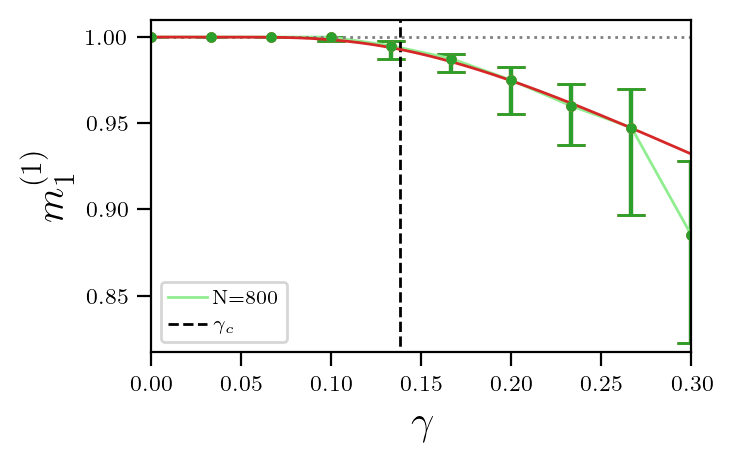

In [20]:
idx = 1
a = [np.array([x[idx] for x in magns]), np.array([np.abs(x[idx]-x[2]) for x in magns]), np.array([np.abs(x[3]-x[idx]) for x in magns])]
a1 = [np.array([x[idx] for x in magns1]), np.array([np.abs(x[idx]-x[2]) for x in magns1]), np.array([np.abs(x[3]-x[idx]) for x in magns1])]
a2 = [np.array([x[idx] for x in magns2]), np.array([np.abs(x[idx]-x[2]) for x in magns2]), np.array([np.abs(x[3]-x[idx]) for x in magns2])]

Mg=np.linspace(0, np.max(γ), 20000)
plt.errorbar(γ, a2[0], yerr=[a2[1],a2[2]], fmt='o', capsize=5, capthick=1, elinewidth=1.5)
plt.errorbar(γ, a2[0], yerr=[a2[1],a2[2]], fmt='o', capsize=5, capthick=1, elinewidth=1.5)
plt.errorbar(γ, a2[0], yerr=[a2[1],a2[2]], fmt='o', capsize=5, capthick=1, elinewidth=1.5)
plt.plot(γ, a2[0],  label = "N=800", color ='lightgreen')
plt.vlines(0.138, 0,2, color='black', linestyle='dashed', label ="$\\gamma_c$")
plt.hlines(1, 0,2, color='gray', linestyle='dotted')
plt.plot(Mg, [erf(1/np.sqrt(2*g)) for g in Mg])
#plt.plot(γ, a[0], color = 'green', label = "N=50")
#plt.plot(γ, a1[0], color = 'blue', label = "N=20")
plt.legend()
plt.ylim(np.min(np.abs(a2[0]-a2[1]))-0.005,1.01)
plt.xlim(0,np.max(γ))
plt.xlabel("$\\gamma$", size = 15)
plt.ylabel("$m^{(1)}_1$", size = 15)
plt.show()

In [8]:
# da lanciare con N=1000, Mval=50, repeat=50
totale = []
for ρ in tqdm([[0.0,0.0,0.0], [0.0,0.2,0.2], [0.2,0.2,0.2]]):
    ρ = np.array(ρ)
    tot_parziale = []
    for γ in np.linspace(0.01, 0.5, 7):
        N = 200; L = 3; K = int(N*γ); β=1000; repeat=30
        ξ = gen_patterns(N,K, L, repeat)
        Mtrain = 5
        Mval = 10
        η, r = gen_archetypes(ξ, Mtrain, ρ)
        σr = tf.transpose(gen_dataset(ξ, r, Mval), perm=[0, 2, 1, 3])
        Jij = Hebb_J(η)

        Net = TAM3_Network()
        Net.prepare(Jij)

        Net.dynamics(σr, 30, ρ, [1.0,1.0,1.0], β)
        magn_temp = tf.abs(tf.einsum("Ssli, Sli->Ssl" ,Net.σ, ξ[:,:,0,:])/σr.shape[3])
        magn = np.mean(magn_temp, axis=1)
        # Intervallo che contiene il 65% dei dati
        lower_bound = np.quantile(magn, 0.15, axis=0)
        upper_bound = np.quantile(magn, 0.85, axis=0)
        tot_parziale.append([np.mean(magn, axis=0), lower_bound, upper_bound])
        print(f"ρ = {ρ}, γ = {γ}", end = '\r')
    totale.append(tot_parziale)
totale = np.array(totale)

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:06<00:12,  6.49s/it]

 67%|██████▋   | 2/3 [00:12<00:06,  6.10s/it]

100%|██████████| 3/3 [00:17<00:00,  5.68s/it]

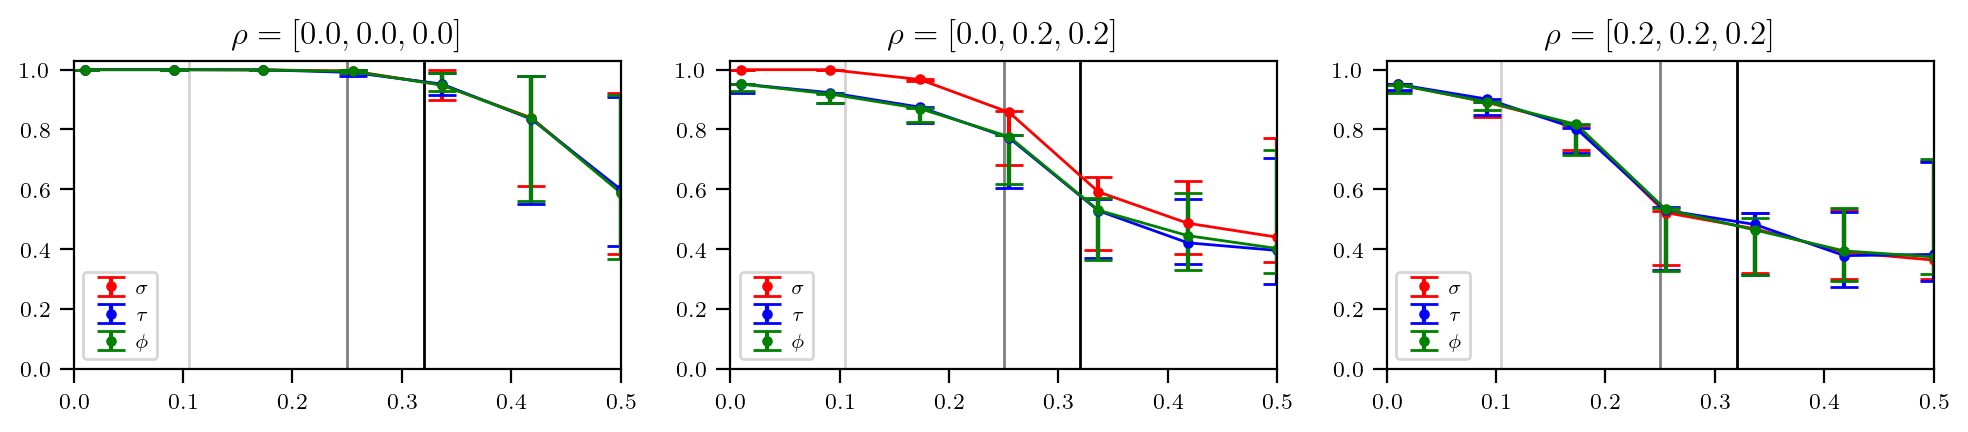

In [11]:
fig = plt.figure(figsize=(12,2))
for r in [0,1,2]:
    plt.subplot(1,3,r+1)
    limit = [0.32, 0.25, 0.105]
    ρv=[[0.0,0.0,0.0], [0.0,0.2,0.2], [0.2,0.2,0.2]]
    layer=['$\\sigma$','$\\tau$','$\\phi$' ]

    L= [0,1,2]
    c=['red', 'blue', 'green']
    plt.vlines(limit[0],0,1.1, color='black')
    plt.vlines(limit[1],0,1.1, color='grey')
    plt.vlines(limit[2],0,1.1, color='lightgrey')

    for a in L:
        plt.errorbar(np.linspace(0.01, 0.5, 7), totale[r,:,0,a], yerr=[ np.abs(totale[r,:,0,a]-totale[r,:,1,a]), np.abs(totale[0,:,0,a]-totale[0,:,2,a])], fmt='o', label=f'{layer[a]}', capsize=5, capthick=1, elinewidth=1.5, color =c[a])
        plt.plot(np.linspace(0.01, 0.5, 7), totale[r,:,0, a], color = c[a])
    plt.title(f'$\\rho = {ρv[r]}$')
    plt.legend(loc='lower left')
    plt.xlim(0,0.5)
    plt.ylim(0,1.03)

***
***
***

In [13]:
totalG = np.load("/Users/andreaalessandrelli/Desktop/CODICI/tensorFlow/risultati_MC.npy")
γs = np.linspace(0.01, 0.5, 12)


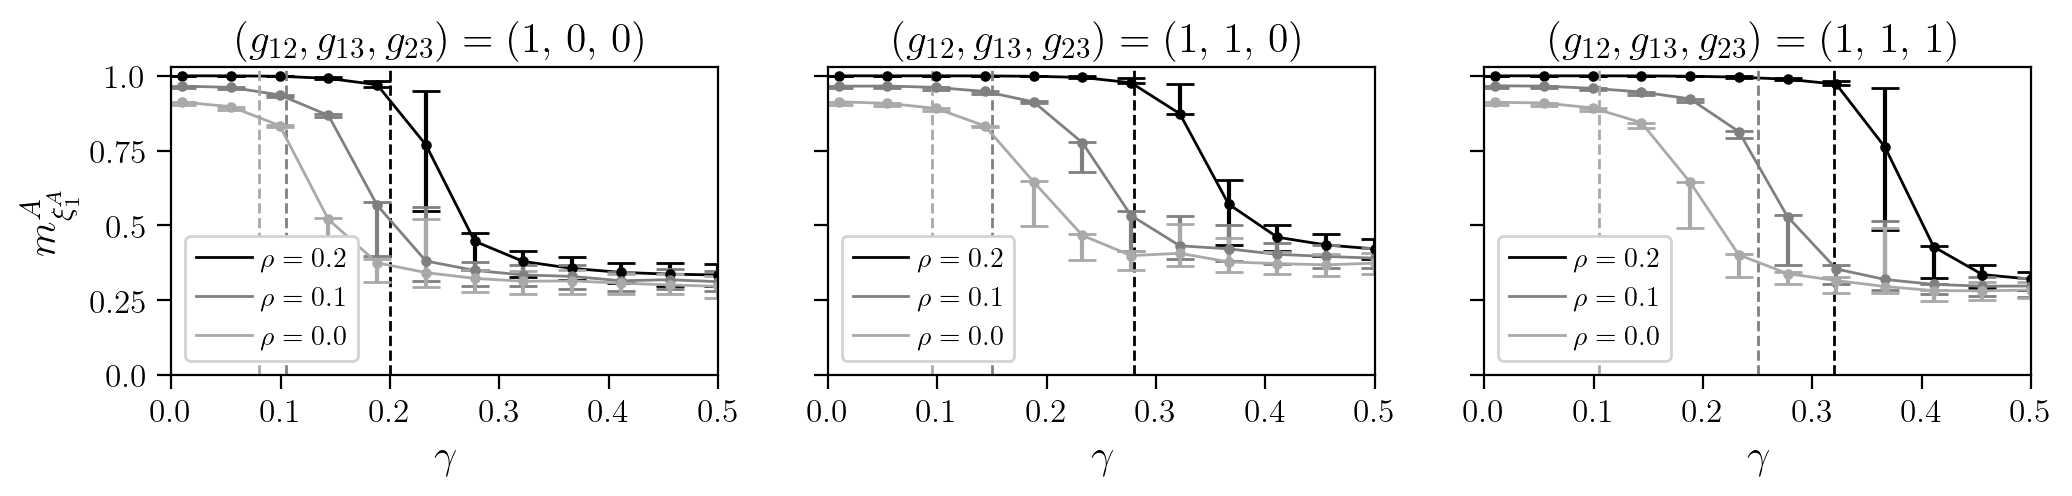

In [14]:
limit = np.array([[0.2, 0.105,0.08], [0.28, 0.15,0.095],[0.32, 0.25, 0.105]])
Gv1 = [[1.0,0.0,0.0], [1.0,1.0,0.0], [1.0,1.0,1.0]]
L= [0,1,2]
c=['black', 'gray', 'darkgray']
fig = plt.figure(figsize=(12,2))
for idg, ga in enumerate([0,1,2]):
    plt.subplot(1,3,idg+1)
    for idr, r in enumerate([0.2,0.1,0.0]):
        a=0
        plt.errorbar(γs, totalG[ga,idr,:,0,a], yerr=[ np.abs(totalG[ga, idr,:,0,a]-totalG[ga, idr,:,1,a]), np.abs(totalG[ga,0,:,0,a]-totalG[ga, 0,:,2,a])], fmt='o', capsize=5, capthick=1, elinewidth=1.5, color =c[idr])
        plt.plot(γs, totalG[ga, idr,:,0, a], color = c[idr], label = f'$\\rho = {r}$')
        plt.vlines(limit[ga, idr],0,1.1, color=c[idr], linestyle='dashed')
    if idg !=0:
        plt.yticks(np.linspace(0,1,5),['']*5)
    else:
        plt.yticks(np.linspace(0,1,5), np.round(np.linspace(0,1,5),2), size =12)
        plt.ylabel('$m^A_{\\xi_1^A}$', size=15)
    plt.xticks(np.linspace(0,0.5,6), np.round(np.linspace(0,0.5,6),2), size =12)
    plt.xlabel('$\\gamma$', size=15)
    plt.xlim(0,0.5)
    plt.ylim(0,1.03)
    title = ', '.join([str(j)[0] for j in Gv1[idg]])
    plt.title('$(g_{12},g_{13},g_{23}) = ($'+f'{title}'+'$)$', size=15)
    plt.legend(loc='lower left', fontsize=10, facecolor='white', edgecolor='lightgray', framealpha=1)
plt.show()